#### Name : `MUTHU PANDI`

#### Batch : `July 2022`

# THE SPARK FOUNDATION

## GripJuly22

## DATA SCIENCE AND BUSINESS ANALYTICS INTERN

##  TASK 1 : `PREDICTION USING SUPERVISED MACHINE LEARNING`

#### _Predict the precentage of an student based on no. of study hours_

Dataset : <a>http://bit.ly/w-data</a>

# Linear Regression from Scratch

#### _Method Used : Gradient Descent_

### Importing Packages 

**Packages Used :**
- Pandas 
- Numpy
- Matplotlib
- Sklearn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split

### Importing the Data 

In [4]:
data = pd.read_csv("student_scores.csv")

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Visualizing the given Data

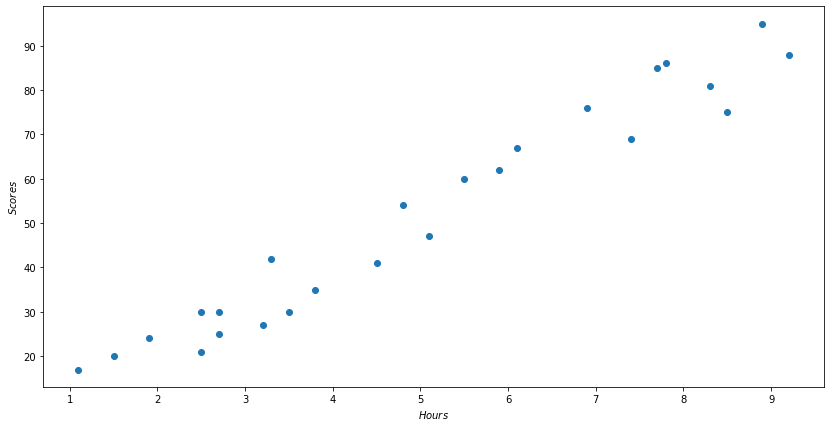

In [6]:
plt.figure(figsize=(14,7))
plt.scatter(data["Hours"],data["Scores"])
plt.xlabel("$Hours$")
plt.ylabel('$Scores$')
plt.show()

### Preprocessing the Data

**Standardizing  the Data**

In [7]:
ss = StandardScaler()

In [8]:
ss.fit(data)
scaled_data = ss.transform(data)

In [9]:
scaled_data

array([[-1.01532822, -1.23022337],
       [ 0.03556882, -0.18082023],
       [-0.7323944 , -0.98805342],
       [ 1.40981881,  0.94930623],
       [-0.61113705, -0.86696844],
       [-1.4195194 , -1.27058503],
       [ 1.69275263,  1.4740078 ],
       [ 0.19724529,  0.34388134],
       [ 1.32898057,  1.19147618],
       [-0.93448999, -1.06877674],
       [ 1.08646587,  1.35292282],
       [ 0.35892176,  0.42460466],
       [-0.20694588, -0.42299019],
       [-0.69197529, -0.38262853],
       [-1.58119586, -1.39167001],
       [ 1.57149528,  1.75653941],
       [-1.01532822, -0.86696844],
       [-1.25784293, -1.1091384 ],
       [ 0.43975999,  0.62641295],
       [ 0.96520852,  0.70713627],
       [-0.93448999, -0.86696844],
       [-0.08568853,  0.10171138],
       [-0.4898797 , -0.66516014],
       [ 0.76311293,  0.98966788],
       [ 1.12688499,  1.39328448]])

## Splitting the Data into Train and Test Set

In [10]:
X = scaled_data[:,0]
y = scaled_data[:,1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Defining the class for Linear Regression

In [17]:
class Linear_Regression:
    
    def __init__(self,iterations,learning_rate):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.costs = []
        

    def fit(self,x,y):

        n  = x.shape[0]
        self.b0 = 0
        self.b1 = 0
        alpha = self.learning_rate
        iterations = self.iterations

        for i in range(iterations):
            y_pred = self.predict(x)
            cost = (1/2*n) * np.sum((y_pred - y) ** 2)

            d_b0 = (1/n) * np.sum(y_pred - y)
            d_b1 = (1/n) * np.sum((y_pred - y) * x)

            self.b0 = self.b0 -  alpha * d_b0
            self.b1 = self.b1 - alpha * d_b1

            print(f" Iteration : {i : .2f} , b0 : {self.b0 : .8f} , b1 : {self.b1 :.8f} , Cost : {cost : .10f}")
            
            self.costs.append(cost)

        return y_pred
    
    def predict(self,X):
        return self.b1 * X + self.b0

In [18]:
def evaluation(y,y_pred):
    n = y.shape[0]
    y_mean = np.mean(y)
    rmse = (1/n) * np.sqrt(np.sum((y - y_pred) ** 2))
    
    TSS = np.sum((y_mean - y) ** 2)
    RSS = np.sum((y - y_pred) ** 2)
    
    r2 = 1 - (RSS/TSS)
    
    print(f'''
    Evaluation :
      Root Mean Square Error : {rmse}
      R Square Value         : {r2} ''')
   

def plot(x,y,z):
    plt.figure(figsize=(14,7))
    plt.scatter(x,y,label = "Scattered Data Points",c="orange")
    plt.plot(x,z,label = "Best  Fit Line",c='r')
    plt.xlabel("Hours")
    plt.ylabel("Score")
    plt.legend()
    plt.show()
    
def cost_plot(X):
    plt.plot(X,label = "Cost")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()

### Training the Model

In [19]:
learning_rate = 0.05
iterations = 100

In [20]:
regressor = Linear_Regression(iterations=100 , learning_rate = 0.05)

In [21]:
y_train_pred = regressor.fit(X_train,y_train)

evaluation(y_train,y_train_pred)


 Iteration :  0.00 , b0 :  0.00559009 , b1 : 0.05687939 , Cost :  147.1339741852
 Iteration :  1.00 , b0 :  0.01060554 , b1 : 0.11037610 , Cost :  130.9102017867
 Iteration :  2.00 , b0 :  0.01509263 , b1 : 0.16069258 , Cost :  116.5708112480
 Iteration :  3.00 , b0 :  0.01909429 , b1 : 0.20801906 , Cost :  103.8958951050
 Iteration :  4.00 , b0 :  0.02265029 , b1 : 0.25253436 , Cost :  92.6913078765
 Iteration :  5.00 , b0 :  0.02579752 , b1 : 0.29440655 , Cost :  82.7856387108
 Iteration :  6.00 , b0 :  0.02857011 , b1 : 0.33379358 , Cost :  74.0275406675
 Iteration :  7.00 , b0 :  0.03099971 , b1 : 0.37084393 , Cost :  66.2833745371
 Iteration :  8.00 , b0 :  0.03311558 , b1 : 0.40569714 , Cost :  59.4351300811
 Iteration :  9.00 , b0 :  0.03494480 , b1 : 0.43848440 , Cost :  53.3785919582
 Iteration :  10.00 , b0 :  0.03651244 , b1 : 0.46932900 , Cost :  48.0217214751
 Iteration :  11.00 , b0 :  0.03784165 , b1 : 0.49834683 , Cost :  43.2832287083
 Iteration :  12.00 , b0 :  0.0389

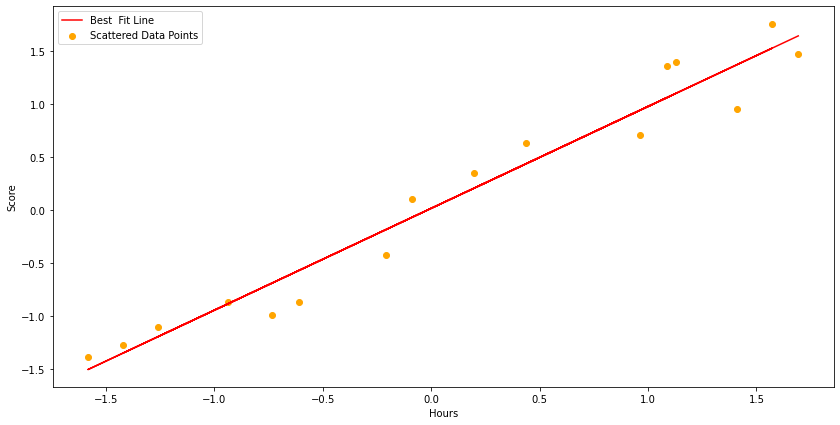

In [22]:
plot(X_train,y_train,y_train_pred)

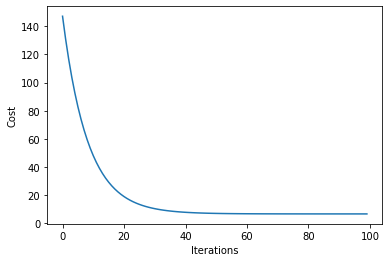

In [23]:
cost_plot(regressor.costs)

## Testing the Model

In [24]:
y_test_pred = regressor.predict(X_test)

In [25]:
evaluation(y_test,y_test_pred)


    Evaluation :
      Root Mean Square Error : 0.06629024047986716
      R Square Value         : 0.9430732920418663 


##

## Testing the Score for Study Hour $9.25$

In [26]:
ans = ss.transform(np.array([[9.25,0]]))

In [27]:
ans[0][1] = regressor.predict(ans[0][0])

In [28]:
score = ss.inverse_transform(ans)[0][1]

In [29]:
score

92.60784760027528

# Final Result

### *For a Study Hour of $9.25 hrs $  the student will score a  Score of  $92$ % .*